In [14]:
# TensorFlow ≥2.0 is required for this notebook
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

'''# check if GPU is available as this notebook will be very slow without GPU
if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
'''
import numpy as np
import matplotlib.pyplot as plt

# Importing the Keras libraries and packages
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GaussianNoise
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.5,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory('../data/training',
                                                 target_size = (32, 32),
                                                 batch_size = 4,
                                                 class_mode = 'binary')

#using same sets because not enough pictures in total...
test_set = test_datagen.flow_from_directory('../data/test',
                                            target_size = (32, 32),
                                            batch_size = 4,
                                            class_mode = 'binary')

Found 228 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


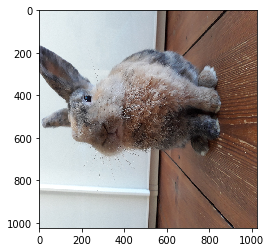

In [16]:
test_image = image.load_img('testing/willy.jpg', target_size = (1024,1024))
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.)

In [18]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D

n_classes = 4
# build a transfer learning model with Xception and a new Fully-Connected-Classifier
base_model = Xception(
    weights='imagenet',
    include_top=False
)
model = GlobalAveragePooling2D()(base_model.output)
model = Dropout(0.5)(model)

# include new Fully-Connected-Classifier
output_layer = Dense(n_classes, activation='softmax')(model)

# create Model
model = Model(base_model.input, output_layer)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [20]:
# set the pretrained layers to not trainable because
# there are already trained and we don't want to destroy
# their weights
for layer in base_model.layers:
  layer.trainable = False

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    training_set,
    epochs=5,
    validation_data=test_set
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 57 steps, validate for 14 steps
Epoch 1/5
57/57 [==============================] - 105s 2s/step - loss: 10.9812 - accuracy: 0.2149 - val_loss: 1.8721 - val_accuracy: 0.5556
Epoch 2/5
57/57 [==============================] - 97s 2s/step - loss: 15.5056 - accuracy: 0.3246 - val_loss: 1.7108 - val_accuracy: 0.2963
Epoch 3/5
57/57 [==============================] - 126s 2s/step - loss: 11.0143 - accuracy: 0.3070 - val_loss: 2.2425 - val_accuracy: 0.2778
Epoch 4/5
39/57 [===================>..........] - ETA: 1:00 - loss: 11.4369 - accuracy: 0.2237

KeyboardInterrupt: 

In [ ]:
#finetuning
for layer in base_model.layers:
  layer.trainable = True

#decrease learning rate and increase number of epochs!
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_finetune=model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)